# Import Library

In [1]:
!pip install google-play-scraper

In [2]:
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score


In [3]:
!pip install gensim

In [4]:
# !pip uninstall numpy
# !pip uninstall tensorflow
# !pip install numpy==1.25.2
# !pip install tensorflow==2.15.0

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Scraping Dataset

In [6]:
scrapreview = reviews_all(
    'com.tokopedia.tkpd',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=10000
)

In [7]:
# Menyimpan ulasan dalam file CSV
import csv

with open('ulasan_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
  writer = csv.writer(file)
  writer.writerow(['Review']) # Menulis header kolom
  for review in scrapreview:
    writer.writerow([review['content']]) # menulis konten ulasan ke dalam file CSV

# Loading Dataset

In [8]:
tkpd_review_df = pd.DataFrame(scrapreview)
tkpd_review_df.to_csv('ulasan_aplikasi.csv', index=False)

In [9]:
tkpd_review_df.shape

(184500, 11)

In [10]:
tkpd_review_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c4d64638-5f79-470d-a6d7-3510c5b44648,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi Payah.. Baru Pertama Pakai Tokopedia ...,2,28,3.305.0,2025-04-07 02:55:19,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-07 03:27:03,3.305.0
1,a801cb94-be3d-459b-9faa-ccb04fe97709,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"pantes kalian hampir bangkrut, cara kalian men...",1,299,3.304.0,2025-03-20 15:14:43,"Halo Toppers, terima kasih atas rating yang ka...",2025-03-20 15:47:04,3.304.0
2,7d64cae4-117d-4421-96a2-6bc33b49e7da,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bisa g sih ubah kurir rekomendasi berdasarkan ...,2,37,3.305.0,2025-04-05 07:01:00,"Halo Toppers, terima kasih atas rating yang ka...",2025-04-05 07:20:06,3.305.0
3,82ab6537-5c22-4c9c-8c19-00f52a4c3612,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Makin kesini, makin nggak nyaman belanja di To...",2,0,3.304.0,2025-03-24 06:45:56,"Halo Toppers, terima kasih atas rating yang ka...",2025-03-24 07:07:01,3.304.0
4,348365cb-b113-448b-bdc0-fedb6e9e7595,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya sangat bagus, namun aku kasih bint...",3,5,3.305.0,2025-04-09 11:28:39,"Terima kasih atas rating yang kamu berikan, To...",2025-04-09 11:47:01,3.305.0


In [11]:
tkpd_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184500 entries, 0 to 184499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              184500 non-null  object        
 1   userName              184500 non-null  object        
 2   userImage             184500 non-null  object        
 3   content               184500 non-null  object        
 4   score                 184500 non-null  int64         
 5   thumbsUpCount         184500 non-null  int64         
 6   reviewCreatedVersion  128482 non-null  object        
 7   at                    184500 non-null  datetime64[ns]
 8   replyContent          90744 non-null   object        
 9   repliedAt             90744 non-null   datetime64[ns]
 10  appVersion            128482 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 15.5+ MB


# Cleaning Data


In [12]:
clean_df = tkpd_review_df.dropna()
clean_df = clean_df.drop_duplicates()

In [13]:
clean_df.shape

(69452, 11)

In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69452 entries, 0 to 184491
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              69452 non-null  object        
 1   userName              69452 non-null  object        
 2   userImage             69452 non-null  object        
 3   content               69452 non-null  object        
 4   score                 69452 non-null  int64         
 5   thumbsUpCount         69452 non-null  int64         
 6   reviewCreatedVersion  69452 non-null  object        
 7   at                    69452 non-null  datetime64[ns]
 8   replyContent          69452 non-null  object        
 9   repliedAt             69452 non-null  datetime64[ns]
 10  appVersion            69452 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 6.4+ MB


# Preprocessing Text

In [15]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [16]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [17]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c4d64638-5f79-470d-a6d7-3510c5b44648,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi Payah.. Baru Pertama Pakai Tokopedia ...,2,28,3.305.0,2025-04-07 02:55:19,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-07 03:27:03,3.305.0
1,a801cb94-be3d-459b-9faa-ccb04fe97709,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"pantes kalian hampir bangkrut, cara kalian men...",1,299,3.304.0,2025-03-20 15:14:43,"Halo Toppers, terima kasih atas rating yang ka...",2025-03-20 15:47:04,3.304.0
2,7d64cae4-117d-4421-96a2-6bc33b49e7da,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bisa g sih ubah kurir rekomendasi berdasarkan ...,2,37,3.305.0,2025-04-05 07:01:00,"Halo Toppers, terima kasih atas rating yang ka...",2025-04-05 07:20:06,3.305.0
3,82ab6537-5c22-4c9c-8c19-00f52a4c3612,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Makin kesini, makin nggak nyaman belanja di To...",2,0,3.304.0,2025-03-24 06:45:56,"Halo Toppers, terima kasih atas rating yang ka...",2025-03-24 07:07:01,3.304.0
4,348365cb-b113-448b-bdc0-fedb6e9e7595,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya sangat bagus, namun aku kasih bint...",3,5,3.305.0,2025-04-09 11:28:39,"Terima kasih atas rating yang kamu berikan, To...",2025-04-09 11:47:01,3.305.0
...,...,...,...,...,...,...,...,...,...,...,...
184480,4850d4da-8ba4-4d60-b4f3-060ef043ad14,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya sangat kecewa masa barang rusak dijual gi...,1,0,3.175,2022-06-02 10:02:17,Halo Kak Andrea. Mohon maaf atas kendala yang ...,2022-06-02 10:30:08,3.175
184483,4e7be765-55b8-405e-9fb4-08ac7fd06bb2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"wow,,, maasyaa Allah gratis bener bener unutk ...",5,0,3.151,2021-12-23 02:11:35,"Hai Toppers, Terima kasih untuk rating yang te...",2021-12-23 02:30:10,3.151
184484,22ca597c-b657-4e21-afe8-acb0cd3e3cf6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Seller disini Sudah tidak amanah lagi. Barang ...,1,4,3.176,2022-06-08 08:26:16,Mohon maaf Kak atas ketidaknyamanannya. Kami a...,2022-06-08 08:48:03,3.176
184489,aa0c5132-46a1-45cb-b5de-cc0687ca20e3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Pengirimannya lambat ,TDK sesuai dengan tangga...",2,0,3.182,2022-07-21 09:35:38,"Hai Kak Adif, mohon maaf atas ketidaknyamanann...",2022-07-21 10:07:08,3.182


In [18]:
# Membersihkan teks
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil
clean_df['text_casefolding'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata kata slang menjadi kata kata standar
clean_df['text_slangwords'] = clean_df['text_casefolding'].apply(fix_slangwords)

# Memecah teks menjadi token
clean_df['text_tokenizing'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus stopwords
clean_df['text_stopwords'] = clean_df['text_tokenizing'].apply(filteringText)

# Menggabungkan token token menjadi kalimat
clean_df['text_akhir'] = clean_df['text_stopwords'].apply(toSentence)

In [19]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefolding,text_slangwords,text_tokenizing,text_stopwords,text_akhir
0,c4d64638-5f79-470d-a6d7-3510c5b44648,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi Payah.. Baru Pertama Pakai Tokopedia ...,2,28,3.305.0,2025-04-07 02:55:19,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-07 03:27:03,3.305.0,Aplikasi Payah Baru Pertama Pakai Tokopedia te...,aplikasi payah baru pertama pakai tokopedia te...,aplikasi payah baru pertama pakai tokopedia te...,"[aplikasi, payah, baru, pertama, pakai, tokope...","[aplikasi, payah, pakai, tokopedia, pengiriman...",aplikasi payah pakai tokopedia pengiriman co t...
1,a801cb94-be3d-459b-9faa-ccb04fe97709,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"pantes kalian hampir bangkrut, cara kalian men...",1,299,3.304.0,2025-03-20 15:14:43,"Halo Toppers, terima kasih atas rating yang ka...",2025-03-20 15:47:04,3.304.0,pantes kalian hampir bangkrut cara kalian mena...,pantes kalian hampir bangkrut cara kalian mena...,pantes kalian hampir bangkrut cara kalian mena...,"[pantes, kalian, hampir, bangkrut, cara, kalia...","[pantes, bangkrut, menangani, barang, hilang, ...",pantes bangkrut menangani barang hilang sebene...
2,7d64cae4-117d-4421-96a2-6bc33b49e7da,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bisa g sih ubah kurir rekomendasi berdasarkan ...,2,37,3.305.0,2025-04-05 07:01:00,"Halo Toppers, terima kasih atas rating yang ka...",2025-04-05 07:20:06,3.305.0,bisa g sih ubah kurir rekomendasi berdasarkan ...,bisa g sih ubah kurir rekomendasi berdasarkan ...,bisa g sih ubah kurir rekomendasi berdasarkan ...,"[bisa, g, sih, ubah, kurir, rekomendasi, berda...","[g, ubah, kurir, rekomendasi, berdasarkan, pen...",g ubah kurir rekomendasi berdasarkan pengalama...
3,82ab6537-5c22-4c9c-8c19-00f52a4c3612,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Makin kesini, makin nggak nyaman belanja di To...",2,0,3.304.0,2025-03-24 06:45:56,"Halo Toppers, terima kasih atas rating yang ka...",2025-03-24 07:07:01,3.304.0,Makin kesini makin nggak nyaman belanja di Tok...,makin kesini makin nggak nyaman belanja di tok...,makin kesini makin tidak nyaman belanja di tok...,"[makin, kesini, makin, tidak, nyaman, belanja,...","[kesini, nyaman, belanja, tokopedia, saran, tr...",kesini nyaman belanja tokopedia saran transaks...
4,348365cb-b113-448b-bdc0-fedb6e9e7595,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya sangat bagus, namun aku kasih bint...",3,5,3.305.0,2025-04-09 11:28:39,"Terima kasih atas rating yang kamu berikan, To...",2025-04-09 11:47:01,3.305.0,Aplikasinya sangat bagus namun aku kasih binta...,aplikasinya sangat bagus namun aku kasih binta...,aplikasinya sangat bagus namun aku kasih binta...,"[aplikasinya, sangat, bagus, namun, aku, kasih...","[aplikasinya, bagus, kasih, bintang, bug, mene...",aplikasinya bagus kasih bintang bug menerima p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184480,4850d4da-8ba4-4d60-b4f3-060ef043ad14,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya sangat kecewa masa barang rusak dijual gi...,1,0,3.175,2022-06-02 10:02:17,Halo Kak Andrea. Mohon maaf atas kendala yang ...,2022-06-02 10:30:08,3.175,Saya sangat kecewa masa barang rusak dijual gi...,saya sangat kecewa masa barang rusak dijual gi...,saya sangat kecewa masa barang rusak dijual gi...,"[saya, sangat, kecewa, masa, barang, rusak, di...","[kecewa, barang, rusak, dijual, giliran, diret...",kecewa barang rusak dijual giliran diretur mau...
184483,4e7be765-55b8-405e-9fb4-08ac7fd06bb2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"wow,,, maasyaa Allah gratis bener bener unutk ...",5,0,3.151,2021-12-23 02:11:35,"Hai Toppers, Terima kasih untuk rating yang te...",2021-12-23 02:30:10,3.151,wow maasyaa Allah grat

# Pelabelan

In [20]:
import csv
import requests
from io import StringIO

# Positive lexicon data
lexicon_positive = dict()
response = requests.get("https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv")

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch data")

In [21]:
# Negative lexicon data
lexicon_negative = dict()
response = requests.get("https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv")

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch data")

In [22]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
    for word in text:
        if word in lexicon_negative:
            score += lexicon_negative[word]

    # Menentukan polaritas berdasarkan skor
    if score > 0.5:
        polarity = 'positive'
    elif score < -0.5:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity


In [23]:
results = clean_df['text_stopwords'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    32686
negative    31080
neutral      5686
Name: count, dtype: int64


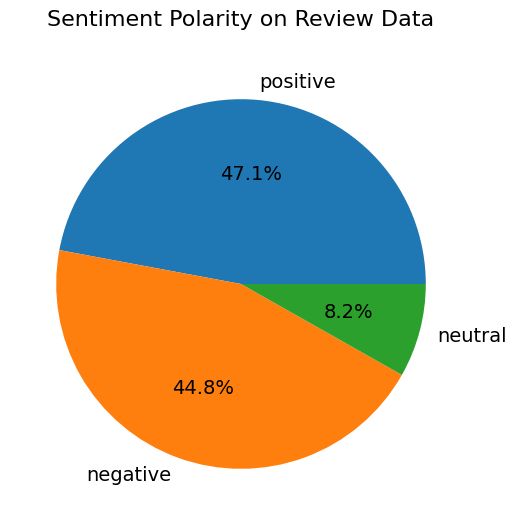

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)
explode = (0, 0, 0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title("Sentiment Polarity on Review Data", fontsize=16, pad=20)
plt.show()

In [25]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopwords']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [26]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopwords']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

In [27]:
# list_words = ''

# for tweet in clean_df['text_stopwords']:
#     for word in tweet:
#       list_words += ' ' + (word)

# wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.set_title("Word Cloud of Tweets Data", fontsize=18)
# ax.grid(False)
# ax.imshow((wordcloud))
# fig.tight_layout(pad=0)
# ax.axis('off')
# plt.show()

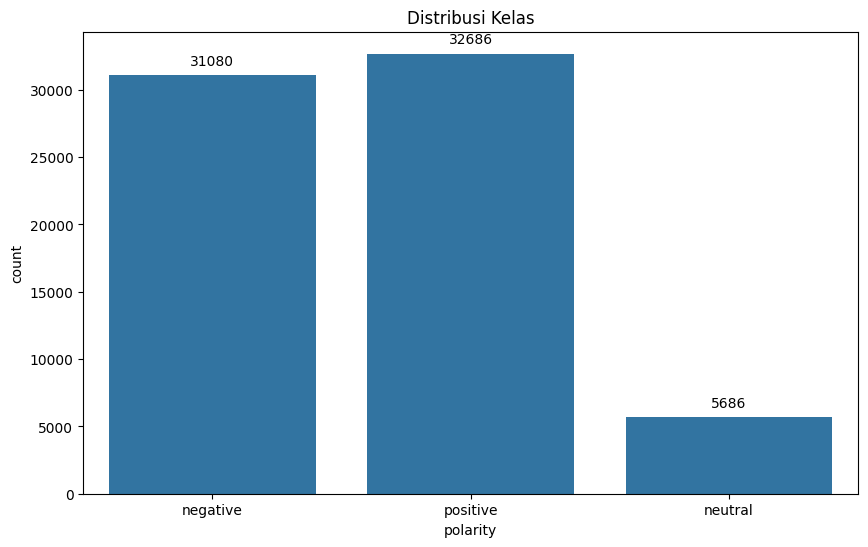

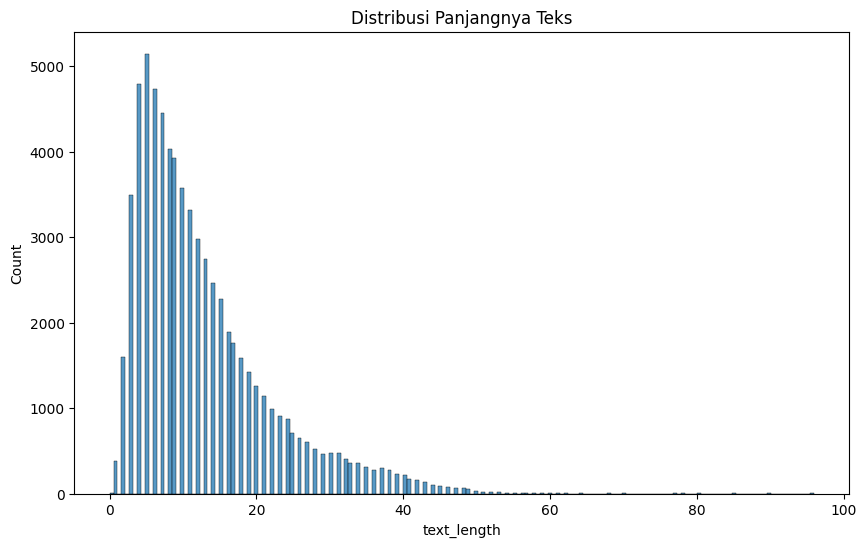

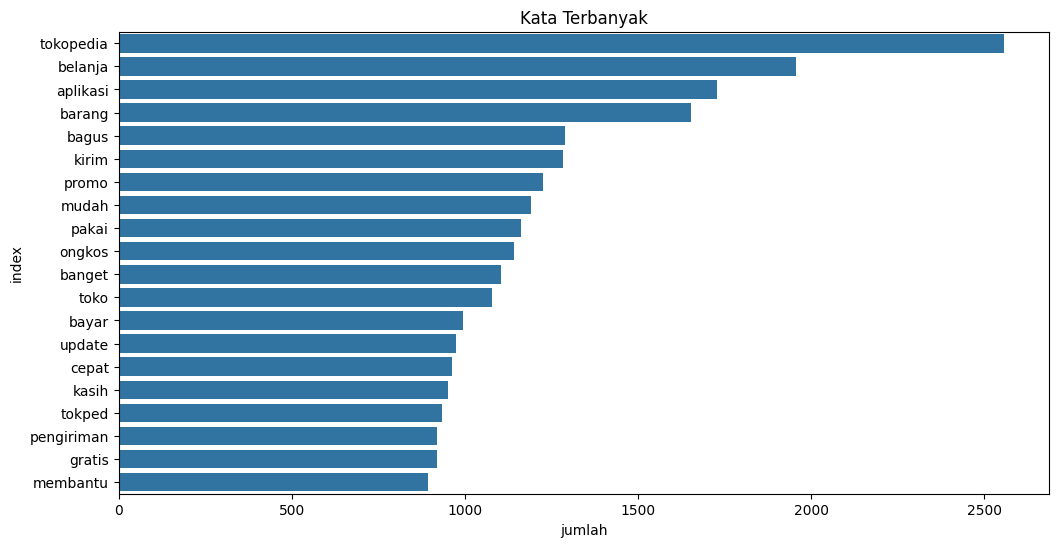

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Visualisasi
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Distribusi Kelas')
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Visualiasi distribusi panjang teks
plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Distribusi Panjangnya Teks')
plt.show()

# Visualisasi kata terbanyak
plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Kata Terbanyak')
plt.show()


# Data Splitting


In [29]:
X = clean_df['text_akhir']
y = clean_df['polarity']

## Ektraksi TF-IDF

In [30]:
# Ektraksi firut dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

In [31]:
# Konversi hasil ektraksi fitur menjadi df
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
features_df

,admin,akun,alamat,alasan,aman,aneh,apk,aplikasi,aplikasinya,app,...,toped,transaksi,trus,uang,udh,ulasan,update,verifikasi,via,voucher
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.152285,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.60743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.236558,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from sklearn.model_selection import train_test_split,GridSearchCV

# Data splitting TF-IDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## Ekstraksi Word2Vec

In [33]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [34]:
word2vec = Word2Vec(sentences=clean_df['text_stopwords'], vector_size=100, window=5, min_count=1, sg=0)


In [35]:
def get_sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

X_w2v = np.array([get_sentence_vector(tokens, word2vec) for tokens in clean_df['text_stopwords']])

# Check hasil vektor
print('Shape of Word2Vec matrix',X_w2v)

Shape of Word2Vec matrix [[ 0.57828546 -0.30308005  0.11405808 ... -0.08696976 -0.79579544
  -0.01237434]
 [ 0.23963025 -0.0523353   0.02175102 ...  0.03468912 -0.75621253
  -0.15768321]
 [ 0.342374   -0.10848708  0.16951729 ... -0.12795222 -0.79777545
   0.20586447]
 ...
 [ 0.58918202 -0.27993864 -0.01246935 ...  0.00478345 -1.25110602
   0.02357805]
 [ 0.45902291  0.03721219  0.25617018 ...  0.49675736 -1.65664375
   0.12779607]
 [-0.17028074  0.02227044 -0.50505823 ... -0.54375935 -0.23696522
  -0.22129454]]


In [36]:
# Data splitting Word2Vec
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

# Pemodelan

## Naive Bayes

In [37]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes = BernoulliNB()
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)

print("Akurasi Naive Bayes (Training):", accuracy_train_nb)
print("Akurasi Naive Bayes (Testing):", accuracy_test_nb)

Akurasi Naive Bayes (Training): 0.7329241734310038
Akurasi Naive Bayes (Testing): 0.7366640270678857


## Random Forest

### Word2Vec

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train_w2v, y_train_w2v)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf_w2v = random_forest.predict(X_train_w2v)
y_pred_test_rf_w2v = random_forest.predict(X_test_w2v)

# Evaluasi akurasi model Random Forest
accuracy_train_rf_w2v = accuracy_score(y_pred_train_rf_w2v, y_train_w2v)
accuracy_test_rf_w2v = accuracy_score(y_pred_test_rf_w2v, y_test_w2v)

# Menampilkan akurasi
print('Random Forest - accuracy_train_w2v:', accuracy_train_rf_w2v)
print('Random Forest - accuracy_test:', accuracy_test_rf_w2v)

Random Forest - accuracy_train_w2v: 1.0
Random Forest - accuracy_test: 0.7192426751133828


### TF-IDF

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9551843919295909
Random Forest - accuracy_test: 0.7691310920740048


## Logistic Regression

### Word2Vec

In [40]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train_w2v, y_train_w2v)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr_w2v = logistic_regression.predict(X_train_w2v)
y_pred_test_lr_w2v = logistic_regression.predict(X_test_w2v)

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr_w2v = accuracy_score(y_pred_train_lr_w2v, y_train_w2v)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr_w2v = accuracy_score(y_pred_test_lr_w2v, y_test_w2v)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr_w2v)
print('Logistic Regression - accuracy_test:', accuracy_test_lr_w2v)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - accuracy_train: 0.7298464750454455
Logistic Regression - accuracy_test: 0.732776617954071


### TF-IDF

In [41]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.791004481560807
Logistic Regression - accuracy_test: 0.7931034482758621


### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9552023901657638
Decision Tree - accuracy_test: 0.6947663955078828


## Deep Learning

In [43]:
from keras.models import Sequential
from keras.layers import Dense

In [70]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_train_encoded = to_categorical(y_train_encoded)

In [75]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout

le = LabelEncoder()
y_train_int = le.fit_transform(y_train)
y_train_encoded = to_categorical(y_train_int)  # shape (n_samples, 3)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # jumlah kelas
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train.toarray(), y_train_encoded, epochs=100, batch_size=32)


Epoch 1/100
1737/1737 [==============================] - 5s 2ms/step - loss: 0.5836 - accuracy: 0.7684
Epoch 2/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.5326 - accuracy: 0.7906
Epoch 3/100
1737/1737 [==============================] - 3s 2ms/step - loss: 0.5228 - accuracy: 0.7928
Epoch 4/100
1737/1737 [==============================] - 3s 2ms/step - loss: 0.5140 - accuracy: 0.7981
Epoch 5/100
1737/1737 [==============================] - 3s 2ms/step - loss: 0.5065 - accuracy: 0.8007
Epoch 6/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.4991 - accuracy: 0.8032
Epoch 7/100
1737/1737 [==============================] - 3s 2ms/step - loss: 0.4918 - accuracy: 0.8058
Epoch 8/100
1737/1737 [==============================] - 3s 2ms/step - loss: 0.4854 - accuracy: 0.8091
Epoch 9/100
1737/1737 [==============================] - 3s 2ms/step - loss: 0.4784 - accuracy: 0.8124
Epoch 10/100
1737/1737 [==============================] - 4s 2ms/step - l

In [77]:
y_test_int = le.fit_transform(y_test)
y_test_encoded = to_categorical(y_test_int)

model.evaluate(X_test.toarray(), y_test_encoded, batch_size=1)

13891/13891 [==============================] - 19s 1ms/step - loss: 1.2641 - accuracy: 0.7349


[1.2640587091445923, 0.7349362969398499]

In [78]:
from keras.layers import Dropout

num_classes = y_train_encoded.shape[1]
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # untuk mengurangi overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(X_train.toarray(), y_train_encoded, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
1737/1737 [==============================] - 5s 3ms/step - loss: 0.5999 - accuracy: 0.7569
Epoch 2/100
1737/1737 [==============================] - 3s 2ms/step - loss: 0.5448 - accuracy: 0.7869
Epoch 3/100
1737/1737 [==============================] - 3s 2ms/step - loss: 0.5318 - accuracy: 0.7912
Epoch 4/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.5247 - accuracy: 0.7960
Epoch 5/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.5155 - accuracy: 0.7987
Epoch 6/100
1737/1737 [==============================] - 3s 2ms/step - loss: 0.5078 - accuracy: 0.8015
Epoch 7/100
1737/1737 [==============================] - 3s 2ms/step - loss: 0.5009 - accuracy: 0.8036
Epoch 8/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.4947 - accuracy: 0.8062
Epoch 9/100
1737/1737 [==============================] - 3s 2ms/step - loss: 0.4887 - accuracy: 0.8085
Epoch 10/100
1737/1737 [==============================] - 3s 2ms/step - l

In [79]:
model.evaluate(X_test.toarray(), y_test_encoded, batch_size=1)

13891/13891 [==============================] - 18s 1ms/step - loss: 0.7864 - accuracy: 0.7742


[0.7864482998847961, 0.7741703391075134]

In [82]:
from keras.layers import Dropout, BatchNormalization

num_classes = y_train_encoded.shape[1]
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # untuk mengurangi overfitting
    Dense(64, activation='relu'),
    Dropout(0.5),
    BatchNormalization(momentum=0.99),
    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(X_train.toarray(), y_train_encoded, epochs=100, batch_size=32, verbose=1)

Epoch 1/100


Exception ignored in: <function _xla_gc_callback at 0x7dc139eb9a80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


1737/1737 [==============================] - 104s 2ms/step - loss: 0.7174 - accuracy: 0.7039
Epoch 2/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.5944 - accuracy: 0.7680
Epoch 3/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.5754 - accuracy: 0.7768
Epoch 4/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.5667 - accuracy: 0.7796
Epoch 5/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.5587 - accuracy: 0.7833
Epoch 6/100
1737/1737 [==============================] - 5s 3ms/step - loss: 0.5529 - accuracy: 0.7861
Epoch 7/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.5489 - accuracy: 0.7872
Epoch 8/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.5432 - accuracy: 0.7899
Epoch 9/100
1737/1737 [==============================] - 4s 3ms/step - loss: 0.5386 - accuracy: 0.7907
Epoch 10/100
1737/1737 [==============================] - 3s 2ms/step - loss: 0.535

In [84]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

le = LabelEncoder()
y_train_int = le.fit_transform(y_train)
y_train_encoded = to_categorical(y_train_int)  # shape (n_samples, 3)

num_classes = y_train_encoded.shape[1]
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # untuk mengurangi overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train.toarray(), y_train_encoded,
                 epochs=100,
                 batch_size=64,
                 validation_split=0.2,
                 callbacks=[early_stop])

model.fit(X_train.toarray(), y_train_encoded, epochs=100, batch_size=32)


Epoch 1/100
695/695 [==============================] - 3s 3ms/step - loss: 0.6357 - accuracy: 0.7396 - val_loss: 0.5535 - val_accuracy: 0.7841
Epoch 2/100
695/695 [==============================] - 2s 3ms/step - loss: 0.5511 - accuracy: 0.7811 - val_loss: 0.5488 - val_accuracy: 0.7902
Epoch 3/100
695/695 [==============================] - 2s 3ms/step - loss: 0.5351 - accuracy: 0.7887 - val_loss: 0.5444 - val_accuracy: 0.7916
Epoch 4/100
695/695 [==============================] - 2s 3ms/step - loss: 0.5261 - accuracy: 0.7951 - val_loss: 0.5415 - val_accuracy: 0.7921
Epoch 5/100
695/695 [==============================] - 3s 4ms/step - loss: 0.5173 - accuracy: 0.7984 - val_loss: 0.5432 - val_accuracy: 0.7927
Epoch 6/100
695/695 [==============================] - 2s 3ms/step - loss: 0.5107 - accuracy: 0.7999 - val_loss: 0.5428 - val_accuracy: 0.7957
Epoch 7/100
695/695 [==============================] - 2s 3ms/step - loss: 0.5020 - accuracy: 0.8032 - val_loss: 0.5456 - val_accuracy: 0.7924

In [85]:
model.evaluate(X_test.toarray(), y_test_encoded, batch_size=1)

13891/13891 [==============================] - 19s 1ms/step - loss: 0.7829 - accuracy: 0.7773


[0.7829081416130066, 0.7772658467292786]

In [102]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Misalnya kamu sudah punya list teks hasil preprocessing:
texts_cleaned = clean_df['text_akhir']  # hasil dari pipeline preprocessing kamu
labels = clean_df['polarity']         # label kategori

# Tokenisasi teks
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(texts_cleaned)
sequences = tokenizer.texts_to_sequences(texts_cleaned)

# Padding
max_len = 200
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Label encoding
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels_categorical, test_size=0.2, random_state=42)


In [103]:
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

vocab_size = len(tokenizer.word_index) + 1  # +1 buat token OOV

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # jumlah kelas
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          7667712   
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 3)                 195       
                                                     

In [104]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, lr_reduce]
)


Epoch 1/30
1389/1389 [==============================] - 442s 315ms/step - loss: 0.4237 - accuracy: 0.8331 - val_loss: 0.2949 - val_accuracy: 0.8899 - lr: 0.0010
Epoch 2/30
1389/1389 [==============================] - 420s 302ms/step - loss: 0.1956 - accuracy: 0.9272 - val_loss: 0.2616 - val_accuracy: 0.9043 - lr: 0.0010
Epoch 3/30
1389/1389 [==============================] - 429s 309ms/step - loss: 0.1291 - accuracy: 0.9503 - val_loss: 0.2949 - val_accuracy: 0.9064 - lr: 0.0010
Epoch 4/30
1389/1389 [==============================] - 430s 310ms/step - loss: 0.0948 - accuracy: 0.9638 - val_loss: 0.3113 - val_accuracy: 0.9026 - lr: 0.0010
Epoch 5/30
1389/1389 [==============================] - 431s 310ms/step - loss: 0.0725 - accuracy: 0.9725 - val_loss: 0.4011 - val_accuracy: 0.8891 - lr: 0.0010
Epoch 6/30
1389/1389 [==============================] - 430s 309ms/step - loss: 0.0407 - accuracy: 0.9865 - val_loss: 0.4137 - val_accuracy: 0.9012 - lr: 5.0000e-04
Epoch 7/30
1389/1389 [========

In [105]:
loss, acc = model.evaluate(X_test, y_test)
print(f'Akurasi test: {acc:.4f}')

from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test.argmax(1), y_pred.argmax(1), target_names=le.classes_))


435/435 [==============================] - 25s 57ms/step - loss: 0.2529 - accuracy: 0.9089
Akurasi test: 0.9089
435/435 [==============================] - 24s 53ms/step
              precision    recall  f1-score   support

    negative       0.91      0.96      0.93      6251
     neutral       0.65      0.52      0.58      1107
    positive       0.95      0.93      0.94      6533

    accuracy                           0.91     13891
   macro avg       0.83      0.80      0.81     13891
weighted avg       0.91      0.91      0.91     13891



In [106]:
import pickle
from tensorflow.keras.models import load_model

# Misalnya kamu sudah punya model dan tokenizer
# Simpan tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# Simpan model
model.save('model_sentimen.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Inference

In [109]:
import pickle
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Fungsi preprocessing kamu (dummy contoh, ganti dengan fungsi asli kamu)
def preprocessing(teks):
    teks = cleaningText(teks)
    teks = casefoldingText(teks)
    teks = fix_slangwords(teks)
    tokens = tokenizingText(teks)
    tokens = filteringText(tokens)
    return toSentence(tokens)

# Load model
model = load_model('model_sentimen.h5')

# Load tokenizer
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Load label encoder
with open('label_encoder.pkl', 'rb') as f:
    le = pickle.load(f)

# Panjang input yang dipakai saat training
MAX_LEN = 200

# Input kalimat baru
kalimat_baru = input("Masukkan kalimat baru: ")
kalimat_baru_bersih = preprocessing(kalimat_baru)

# Tokenisasi dan padding
sequence = tokenizer.texts_to_sequences([kalimat_baru_bersih])
padded = pad_sequences(sequence, maxlen=MAX_LEN, padding='post')

# Prediksi
prediksi_prob = model.predict(padded)
prediksi_label = np.argmax(prediksi_prob, axis=1)
label_akhir = le.inverse_transform(prediksi_label)

# Output
print(f"\nHasil prediksi: {label_akhir[0].upper()}")


Masukkan kalimat baru: aku sangat suka aplikasinya, ramah pengguna dan banyak promo
1/1 [==============================] - 1s 901ms/step

Hasil prediksi: POSITIVE
